In [1]:
import tensorflow as tf
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

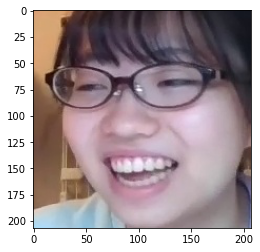

In [2]:
img = image.load_img("./dataset/happy_images/00fb40ee-daf3-4dd8-b9e1-a022078189a4.jpg")
plt.imshow(img)

In [3]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [4]:
import pandas as pd

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.columns =["image", "result"]
train.columns =["image", "result"]

In [6]:
from sklearn.preprocessing import LabelEncoder
le_result = LabelEncoder()
train['result_n'] = le_result.fit_transform(train['result'])
test['result_n'] = le_result.fit_transform(test['result'])

In [7]:
train.head()

,image,result,result_n
0,0403faa2-2d45-4779-b40a-794c220d3855,positive smile,2
1,1ba6784e-3684-4f76-81b7-504610a497e1,positive smile,2
2,675c87fb-bf50-481e-949d-07b5dc14b589,positive smile,2
3,02567fbb-1147-4186-8d7d-38611569fc06,NOT smile,0
4,02a42ebf-0683-4bc2-a616-e2ce8dc507cf,NOT smile,0


In [8]:
positive_smile = train[train.result_n == 2]
fake_smile = train[train.result_n == 1]
smile = positive_smile.append(fake_smile, ignore_index=True)
not_smile = train[train.result_n == 0]

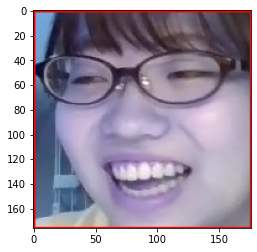

In [9]:
path = "./dataset/happy_images/00fb40ee-daf3-4dd8-b9e1-a022078189a4.jpg"
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
delta_scal = 1.5
while True:
    faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
    if len(faces) != 0:                                                     # at least one face is detected
        break
    else:                                                                   # no face detected, re-detecting with new parameters...
        if 3.0-delta_scal > 1.01:
            delta_scal += 0.01
        else:
            break
if len(faces) != 0 :
    (x,y,w,h) = faces[0]
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
plt.imshow(roi_color)

In [10]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [11]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [12]:
img_dirs

['./dataset/cropped', './dataset/cropped2', './dataset/happy_images']

In [13]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [14]:
path_train = "./dataset/cropped/train/"
path_valid = "./dataset/cropped/valid/"
if os.path.exists(path_train):
     shutil.rmtree(path_train)
os.mkdir(path_train)
if os.path.exists(path_valid):
    shutil.rmtree(path_valid)
os.mkdir(path_valid)

In [15]:
from random import randint

for i in smile["image"]:
    a = randint(1,10)
    path = "./dataset/happy_images/"+ str(i) +".jpg"
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    if len(faces) != 0 :
        (x,y,w,h) = faces[0]
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
    
    if roi_color is not None:
        cropped_folder1 = path_train + "smile"
        cropped_folder2 = path_valid+ "smile"
        if a<9:
            if not os.path.exists(cropped_folder1):
                os.makedirs(cropped_folder1)
                print("Generating cropped images in folder: ",cropped_folder1)
            cropped_file_name = str(i) + ".jpg"
            cropped_file_path = cropped_folder1 + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
        else:
            if not os.path.exists(cropped_folder2):
                os.makedirs(cropped_folder2)
                print("Generating cropped images in folder: ",cropped_folder2)
            cropped_file_name = str(i) + ".jpg"
            cropped_file_path = cropped_folder2 + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)

Generating cropped images in folder:  ./dataset/cropped/train/smile
Generating cropped images in folder:  ./dataset/cropped/valid/smile


In [16]:
from random import randint

for i in not_smile["image"]:
    a = randint(1,10)
    path = "./dataset/happy_images/"+ str(i) +".jpg"
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    if len(faces) != 0 :
        (x,y,w,h) = faces[0]
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
    
    if roi_color is not None:
        cropped_folder1 = path_train + "not_smile"
        cropped_folder2 = path_valid+ "not_smile"
        if a<9:
            if not os.path.exists(cropped_folder1):
                os.makedirs(cropped_folder1)
                print("Generating cropped images in folder: ",cropped_folder1)
            cropped_file_name = str(i) + ".jpg"
            cropped_file_path = cropped_folder1 + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
        else:
            if not os.path.exists(cropped_folder2):
                os.makedirs(cropped_folder2)
                print("Generating cropped images in folder: ",cropped_folder2)
            cropped_file_name = str(i) + ".jpg"
            cropped_file_path = cropped_folder2 + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)

Generating cropped images in folder:  ./dataset/cropped/train/not_smile
Generating cropped images in folder:  ./dataset/cropped/valid/not_smile


In [17]:
import tensorflow as tf
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [18]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [19]:
train_dataset = train.flow_from_directory("./dataset/cropped/train/",target_size=(200,200),batch_size =3,class_mode= "binary")
validation_dataset = validation.flow_from_directory("./dataset/cropped/valid/",target_size=(200,200),batch_size =3, class_mode= "binary")

Found 3858 images belonging to 2 classes.
Found 972 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'not_smile': 0, 'smile': 1}

In [21]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation= "relu",input_shape =(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32,(3,3),activation= "relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation= "relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(99,(3,3),activation= "relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   
                                   tf.keras.layers.Dense(512,activation = "relu"),
                                   
                                   tf.keras.layers.Dense(1,activation = "sigmoid")
                                  ])

In [22]:
model.compile(loss = "binary_crossentropy", optimizer = RMSprop(lr=0.001), metrics = ["accuracy"])

In [23]:
model_fit = model.fit(train_dataset, epochs= 10, validation_data = validation_dataset)

Epoch 1/10
1286/1286 [==============================] - 168s 130ms/step - loss: 0.6777 - accuracy: 0.6914 - val_loss: 0.5786 - val_accuracy: 0.7335
Epoch 2/10
1286/1286 [==============================] - 156s 121ms/step - loss: 0.5779 - accuracy: 0.7244 - val_loss: 0.5613 - val_accuracy: 0.7438
Epoch 3/10
1286/1286 [==============================] - 167s 130ms/step - loss: 0.5600 - accuracy: 0.7560 - val_loss: 0.5551 - val_accuracy: 0.7377
Epoch 4/10
1286/1286 [==============================] - 159s 124ms/step - loss: 0.5286 - accuracy: 0.7724 - val_loss: 0.5641 - val_accuracy: 0.7099
Epoch 5/10
1286/1286 [==============================] - 152s 118ms/step - loss: 0.5416 - accuracy: 0.7712 - val_loss: 0.6143 - val_accuracy: 0.7675
Epoch 6/10
1286/1286 [==============================] - 169s 131ms/step - loss: 0.5221 - accuracy: 0.7726 - val_loss: 0.6259 - val_accuracy: 0.7521
Epoch 7/10
1286/1286 [==============================] - 155s 121ms/step - loss: 0.5165 - accuracy: 0.7917 - val_

In [24]:
path_test= "./dataset/cropped/test/"
if os.path.exists(path_test):
     shutil.rmtree(path_test)
os.mkdir(path_test)

In [25]:
for i in test["image"]:
    
    path = "./dataset/happy_images/"+ str(i) +".jpg"
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    if len(faces) != 0 :
        (x,y,w,h) = faces[0]
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
    
    if roi_color is not None:
        cropped_folder = path_test 
        
        if not os.path.exists(cropped_folder):
            os.makedirs(cropped_folder)
            print("Generating cropped images in folder: ",cropped_folder1)
        cropped_file_name = str(i) + ".jpg"
        cropped_file_path = cropped_folder + "/" + cropped_file_name
        cv2.imwrite(cropped_file_path, roi_color)
            
        

{'not_smile': 0, 'smile': 1}

In [26]:
dir_path = "./dataset/cropped/test"
smile_images =[]
No_smile_images = []
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +"//"+ i, target_size=(200,200))
    #plt.imshow(img)
    #plt.show()
    x = image.img_to_array(img)
    x= np.expand_dims(x, axis =0)
    images = np.vstack([x])
    val = model.predict(images)
    #print(val)
    if val> 10**-9 :
        i_st = str(i)
        s = i[:-4]
        smile_images.append(s)
    else:
        i_st = str(i)
        s = i[:-4]
        No_smile_images.append(s)

In [27]:
path_to_cr_data2 = "./dataset/cropped2/"

In [28]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [29]:
img_dirs

['./dataset/cropped', './dataset/cropped2', './dataset/happy_images']

In [30]:
import shutil
if os.path.exists(path_to_cr_data2):
     shutil.rmtree(path_to_cr_data2)
os.mkdir(path_to_cr_data2)

In [31]:
path_train2 = "./dataset/cropped2/train/"
path_valid2 = "./dataset/cropped2/valid/"
if os.path.exists(path_train2):
     shutil.rmtree(path_train2)
os.mkdir(path_train2)
if os.path.exists(path_valid2):
    shutil.rmtree(path_valid2)
os.mkdir(path_valid2)

In [32]:
from random import randint

for i in positive_smile["image"]:
    a = randint(1,10)
    path = "./dataset/happy_images/"+ str(i) +".jpg"
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    if len(faces) != 0 :
        (x,y,w,h) = faces[0]
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
    
    if roi_color is not None:
        cropped_folder1 = path_train2 + "positive_smile"
        cropped_folder2 = path_valid2 + "positive_smile"
        if a<9:
            if not os.path.exists(cropped_folder1):
                os.makedirs(cropped_folder1)
                print("Generating cropped images in folder: ",cropped_folder1)
            cropped_file_name = str(i) + ".jpg"
            cropped_file_path = cropped_folder1 + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
        else:
            if not os.path.exists(cropped_folder2):
                os.makedirs(cropped_folder2)
                print("Generating cropped images in folder: ",cropped_folder2)
            cropped_file_name = str(i) + ".jpg"
            cropped_file_path = cropped_folder2 + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)

Generating cropped images in folder:  ./dataset/cropped2/train/positive_smile
Generating cropped images in folder:  ./dataset/cropped2/valid/positive_smile


In [33]:
from random import randint

for i in fake_smile["image"]:
    a = randint(1,10)
    path = "./dataset/happy_images/"+ str(i) +".jpg"
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    if len(faces) != 0 :
        (x,y,w,h) = faces[0]
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
    
    if roi_color is not None:
        cropped_folder1 = path_train2 + "fake_smile"
        cropped_folder2 = path_valid2 + "fake_smile"
        if a<9:
            if not os.path.exists(cropped_folder1):
                os.makedirs(cropped_folder1)
                print("Generating cropped images in folder: ",cropped_folder1)
            cropped_file_name = str(i) + ".jpg"
            cropped_file_path = cropped_folder1 + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
        else:
            if not os.path.exists(cropped_folder2):
                os.makedirs(cropped_folder2)
                print("Generating cropped images in folder: ",cropped_folder2)
            cropped_file_name = str(i) + ".jpg"
            cropped_file_path = cropped_folder2 + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)

Generating cropped images in folder:  ./dataset/cropped2/train/fake_smile
Generating cropped images in folder:  ./dataset/cropped2/valid/fake_smile


In [34]:
train_dataset2 = train.flow_from_directory("./dataset/cropped2/train/",target_size=(200,200),batch_size =3,class_mode= "binary")
validation_dataset2 = validation.flow_from_directory("./dataset/cropped2/valid/",target_size=(200,200),batch_size =3, class_mode= "binary")

Found 1172 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


In [35]:
train_dataset2.class_indices

{'fake_smile': 0, 'positive_smile': 1}

In [36]:
model_fit = model.fit(train_dataset2, epochs= 10, validation_data = validation_dataset2)

Epoch 1/10
391/391 [==============================] - 49s 126ms/step - loss: 0.6774 - accuracy: 0.6570 - val_loss: 0.6877 - val_accuracy: 0.6589
Epoch 2/10
391/391 [==============================] - 51s 129ms/step - loss: 0.6356 - accuracy: 0.6519 - val_loss: 0.6106 - val_accuracy: 0.6159
Epoch 3/10
391/391 [==============================] - 49s 125ms/step - loss: 0.6292 - accuracy: 0.6689 - val_loss: 0.6551 - val_accuracy: 0.5199
Epoch 4/10
391/391 [==============================] - 49s 124ms/step - loss: 0.6704 - accuracy: 0.6638 - val_loss: 0.6458 - val_accuracy: 0.5795
Epoch 5/10
391/391 [==============================] - 48s 124ms/step - loss: 0.7008 - accuracy: 0.6775 - val_loss: 0.6231 - val_accuracy: 0.6623
Epoch 6/10
391/391 [==============================] - 48s 123ms/step - loss: 0.6178 - accuracy: 0.6928 - val_loss: 0.7337 - val_accuracy: 0.6722
Epoch 7/10
391/391 [==============================] - 49s 125ms/step - loss: 0.6134 - accuracy: 0.6894 - val_loss: 0.5905 - val_ac

In [37]:
path_test2 = "./dataset/cropped2/test/"

In [38]:
for i in smile_images:
    
    path = "./dataset/happy_images/"+ i +".jpg"
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    if len(faces) != 0 :
        (x,y,w,h) = faces[0]
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
    
    if roi_color is not None:
        cropped_folder1 = path_test2
        
        if not os.path.exists(cropped_folder1):
            os.makedirs(cropped_folder1)
            print("Generating cropped images in folder: ",cropped_folder1)
        cropped_file_name = str(i) + ".jpg"
        cropped_file_path = cropped_folder1 + "/" + cropped_file_name
        cv2.imwrite(cropped_file_path, roi_color)
        

Generating cropped images in folder:  ./dataset/cropped2/test/


In [39]:
dir_path = "./dataset/cropped2/test"
positive_smile_images =[]
fake_smile_images = []
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +"//"+ i, target_size=(200,200))
    x = image.img_to_array(img)
    x= np.expand_dims(x, axis =0)
    images = np.vstack([x])
    val = model.predict(images)
    if val==1:
        i_st = str(i)
        s = i[:-4]
        positive_smile_images.append(s)
    else:
        i_st = str(i)
        s = i[:-4]
        fake_smile_images.append(s)
    

In [40]:
df_ps = pd.DataFrame(positive_smile_images,columns = ["image"])
df_fs = pd.DataFrame(fake_smile_images,columns = ["image"])
df_ns = pd.DataFrame(No_smile_images,columns = ["image"])

In [41]:
test.head()

,image,result,result_n
0,1e53ec28-b4c0-4eef-ad91-4940f535d354,NOT smile,0
1,05f0d520-8e85-4490-a160-5a346fc21fd3,positive smile,2
2,0adf2567-b325-47a8-a2c9-83b34c021163,NOT smile,0
3,0df7e500-a1d0-44dd-923d-25809fa38611,NOT smile,0
4,03d812cd-27be-41b5-b2a1-856e4d1b66ab,NOT smile,0


In [42]:
real_ps_df = test[test.result_n == 2]
real_fs_df = test[test.result_n == 1]
real_ns_df = test[test.result_n == 0]

In [43]:
real_ps = []
real_fs = []
real_ns = []
for i in real_ps_df["image"]:
    real_ps.append(str(i))
for i in real_fs_df["image"]:
    real_fs.append(str(i))
for i in real_ns_df["image"]:
    real_ns.append(str(i))

In [44]:
c1 = 0
for i in real_ps:
    if positive_smile_images.count(i) == 1:
        c1 = c1 + 1
c2 = 0
for i in real_fs:
    if fake_smile_images.count(i) == 1:
        c2 = c2 + 1
c3 = 0
for i in real_ns:
    if No_smile_images.count(i) == 1:
        c3 = c3 + 1
accuracy = (c1/len(real_ps) + c2/len(real_fs) + c3/len(real_ns))/3
print(accuracy)

0.4788265077998362
